# TASK 3
## Task - From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

### Name - Pratibha Kumari Sinha

In [81]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
iris=datasets.load_iris()
%matplotlib inline

# Importing Dataset 

In [82]:
d1 = pd.read_csv('C:\\Users\\Pratibha Sinha\\Downloads\\Iris.csv')

In [83]:
d1.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [84]:
d1.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [85]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [86]:
d1.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [87]:
d1.drop('Id',axis=1,inplace=True)

In [88]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [94]:
d1.loc[d1['Species']=="Iris-setosa",['Species']]='Setosa'
d1.loc[d1['Species']=="Iris-virginica",['Species']]='Virginica'
d1.loc[d1['Species']=="Iris-versicolor",['Species']]='Versicolor'

In [95]:
d1.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [96]:
d1.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


# Data Visualization

### 1. Scatter Plot 

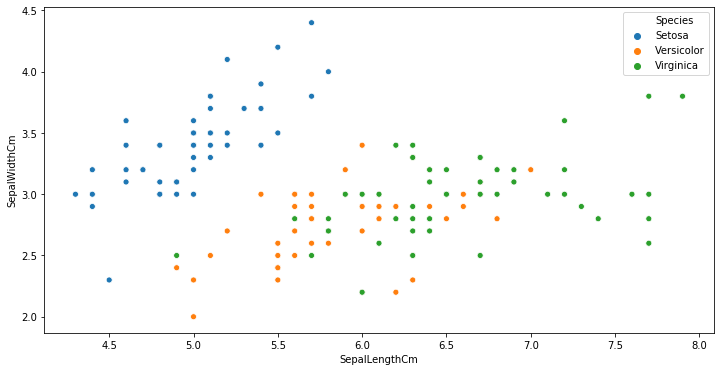

In [99]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='SepalLengthCm',y='SepalWidthCm',data=d1,hue='Species')

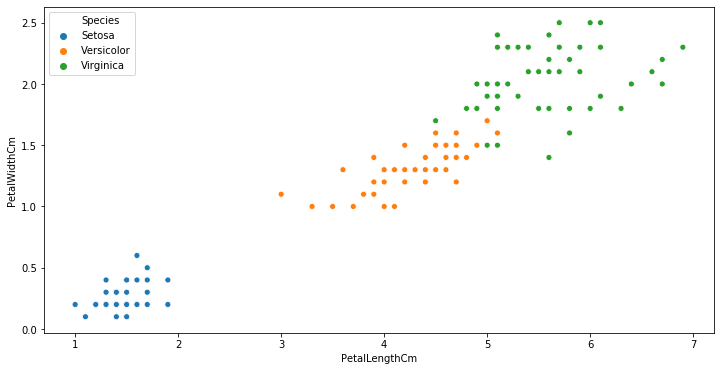

In [100]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='PetalLengthCm',y='PetalWidthCm',data=d1,hue='Species')

### 2. Count Plot 

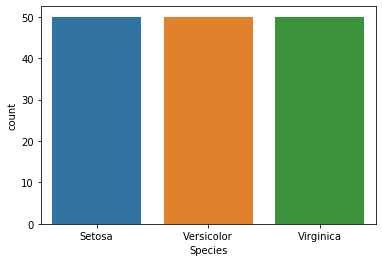

In [101]:
sns.countplot('Species',data=d1)

In [102]:
d1.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


# K-Means Clustering

In [103]:
from sklearn.cluster import KMeans

In [104]:
#Using Elbow Curve to find the number of clusters .Number of clusters are taken where there is abruptly decrease in line in the graph.
x=df.iloc[:,:-1].values
sse=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=None)
    kmeans.fit(x)
    sse.append(kmeans.inertia_)

In [106]:
sse

[681.3706,
 152.34795176035792,
 78.85144142614601,
 57.228473214285714,
 46.44618205128205,
 39.05845904095904,
 34.40900974025974,
 30.06459307359308,
 27.78757487344845,
 25.975139750600277]

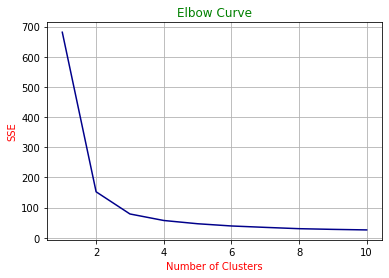

In [112]:
#Plotting the Graph
plt.plot(range(1,11),sse,  color = 'darkblue')
plt.title('Elbow Curve', color = 'green')
plt.xlabel('Number of Clusters', color = 'red')
plt.ylabel('SSE', color = 'red')
plt.grid()
plt.show()

In [113]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
pred= kmeans.fit_predict(x)

### By seeing above graph pattern the optimum number of clusters are 3 

# Final Visual 

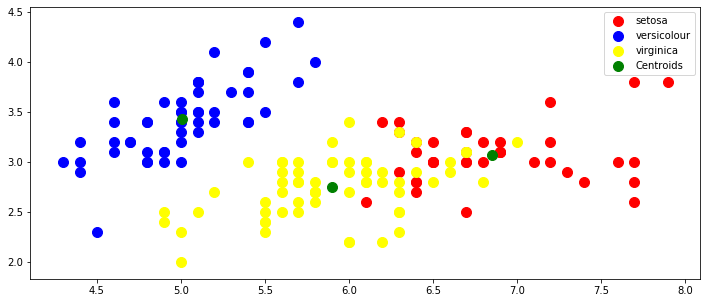

In [114]:
plt.figure(figsize=(12,5))
plt.scatter(x[pred == 0, 0], x[pred == 0, 1], 
            s = 100, c = 'red', label = 'setosa')
plt.scatter(x[pred == 1, 0], x[pred == 1, 1], 
            s = 100, c = 'blue', label = 'versicolour')
plt.scatter(x[pred == 2, 0], x[pred == 2, 1],
            s = 100, c = 'yellow', label = 'virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'green', label = 'Centroids')

plt.legend()